# Model Performance Measures, ML Pipeline and Hyperparameter Tuning

## Can you correctly identify glass type?

## Context:
    
This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 
values)

# Content

Attribute Information:

Id number: 1 to 214

RI: refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

Al: Aluminum

Si: Silicon

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type of glass: (class attribute) 
    -- 1 building_windows_float_processed 
    -- 2 building_windows_non_float_processed 
    -- 3 vehicle_windows_float_processed 
    -- 4 vehicle_windows_non_float_processed (none in this database) 
    -- 5 containers 
    -- 6 tableware 
    -- 7 headlamps

## Source:
https://archive.ics.uci.edu/ml/datasets/Glass+Identification

# 1.  Import necessary libraries and load the data

In [78]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [79]:
glass_data = pd.read_csv('glass-1.csv')
glass_data.head()

,ID,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [80]:
glass_data.shape

(214, 11)

In [81]:
glass_data.isnull().sum()

ID                  0
refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type                0
dtype: int64

In [82]:
glass_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,214.0,107.500000,61.920648,1.00000,54.250000,107.50000,160.750000,214.00000
refractive index,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Sodium,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Magnesium,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Aluminum,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Silicon,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
Potassium,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Calcium,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Barium,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Iron,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


In [83]:
glass_data.dtypes

ID                    int64
refractive index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Type                 object
dtype: object

# Univariate Analysis

<Figure size 720x504 with 0 Axes>

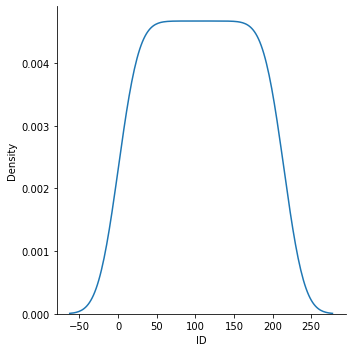

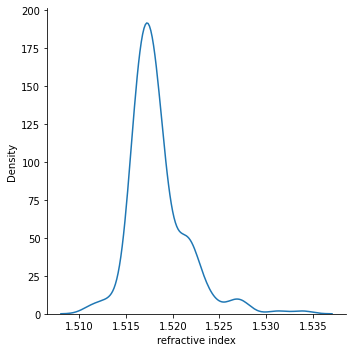

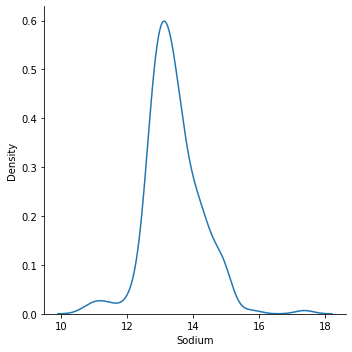

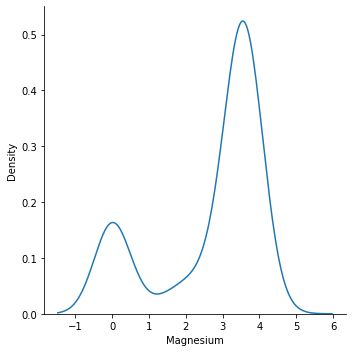

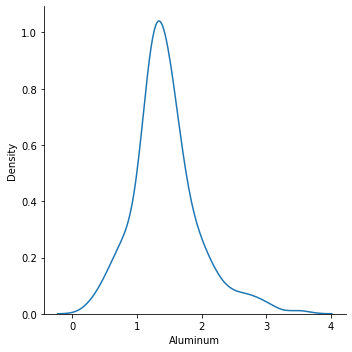

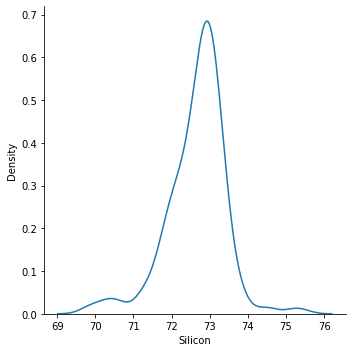

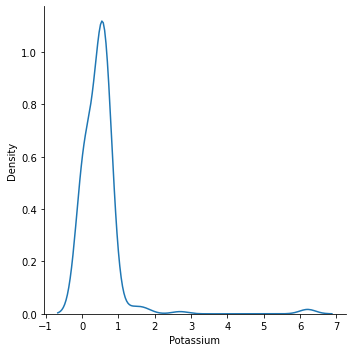

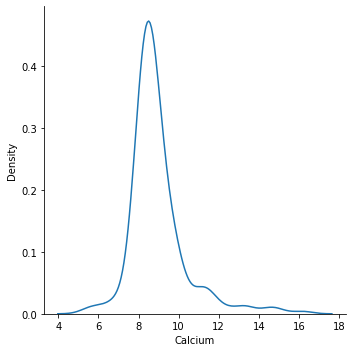

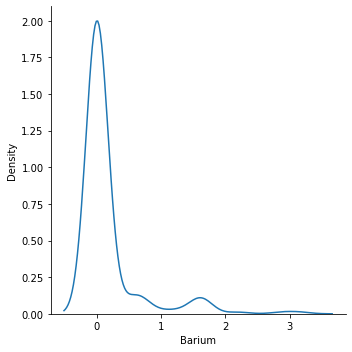

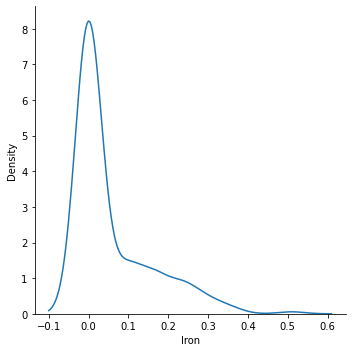

In [84]:
def plot_distributions(data):
    plt.figure(figsize=(10,7))
    for col in data.columns:
        if col == 'Type':
            continue
        sns.displot(data[col], kind='kde')
        plt.show()
plot_distributions(glass_data)

In [85]:
glass_data.drop('ID', axis=1, inplace=True)

In [86]:
glass_data.Type.value_counts()

building_windows_non_float_processed    76
building_windows_float_processed        70
headlamps                               29
vehicle_windows_float_processed         17
containers                              13
tableware                                9
Name: Type, dtype: int64

# 2. Split the data into dependent and independent variables. Also see how the looks like

Hint: you can make use of nay method(iloc or drop method)

In [87]:
X = glass_data.drop('Type', axis=1)
y = glass_data['Type']

# 3. Convert Target variable into numerical

In [88]:
label_encoder = LabelEncoder()
y = pd.Series(label_encoder.fit_transform(y))


# 4. Split the dataset into train and test set 

In [89]:
X_rem, X_test, y_rem, y_test = train_test_split(X,y, test_size=0.2, random_state=7, stratify=y)
X_train,X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.2, random_state=7)

In [90]:
print(y_train.unique())
print(y_val.unique())
print(y_test.unique())

[3 1 5 0 2 4]
[5 3 0 1 2 4]
[1 3 0 5 2 4]


# 5. Build the pipeline
Steps:

Instantiate the pipeline, as first defining standard scaler and on the scaled data run the PCA and then feed it to the logistic regression(or any other algo)

Hint:

Import standard scaler to standardize the data

You can take an algorithm of choice and build a pipeline

In [91]:
pipeline = make_pipeline(
            StandardScaler(),
            PCA(),
            LogisticRegression(solver='liblinear', random_state=7)
            )

# 6.Follow the above steps and check if you can tweak the logistic regression parameters above and make use of Grid search

In [92]:
pipeline.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('pca', PCA()),
  ('logisticregression',
   LogisticRegression(random_state=7, solver='liblinear'))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'pca': PCA(),
 'logisticregression': LogisticRegression(random_state=7, solver='liblinear'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logi

In [108]:
grid_param = {
    'pca__n_components':[5,8],
    'logisticregression__C': [0.001, 0.01,0.5, 0.8, 0.9, 1, 10],
    'logisticregression__fit_intercept': [True, False],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']
}
gs = GridSearchCV(pipeline, param_grid=grid_param, cv=5, n_jobs=5)

In [109]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=7,
                                                           solver='liblinear'))]),
             n_jobs=5,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.5, 0.8, 0.9,
                                                   1, 10],
                         'logisticregression__fit_intercept': [True, False],
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear', 'sag'],
                         'pca__n_components': [5, 8]})

In [110]:
gs.best_params_

{'logisticregression__C': 10,
 'logisticregression__fit_intercept': True,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'newton-cg',
 'pca__n_components': 8}

In [111]:
print('Validation Score: {}'.format(gs.score(X_val, y_val)))

Validation Score: 0.5714285714285714


In [112]:
y_predict = gs.predict(X_test)
y_predict

array([0, 3, 1, 0, 1, 0, 1, 1, 3, 0, 1, 0, 0, 0, 3, 2, 0, 1, 5, 1, 1, 0,
       0, 1, 3, 3, 1, 1, 0, 1, 2, 1, 3, 1, 0, 0, 1, 0, 3, 0, 3, 0, 1])

In [113]:
confusion_matrix(y_test, y_predict)

array([[9, 5, 0, 0, 0, 0],
       [5, 9, 0, 1, 0, 0],
       [0, 0, 2, 1, 0, 0],
       [0, 0, 0, 6, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 1]])

In [114]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.56      0.64      0.60        14
           1       0.56      0.60      0.58        15
           2       1.00      0.67      0.80         3
           3       0.75      1.00      0.86         6
           4       0.00      0.00      0.00         2
           5       1.00      0.33      0.50         3

    accuracy                           0.63        43
   macro avg       0.65      0.54      0.56        43
weighted avg       0.62      0.63      0.61        43



In [115]:
print('Train Score: {}'.format(gs.score(X_train, y_train)))
print('Validation Score: {}'.format(gs.score(X_val, y_val)))
print('Test Score: {}'.format(gs.score(X_test, y_test)))

Train Score: 0.7426470588235294
Validation Score: 0.5714285714285714
Test Score: 0.627906976744186


In [116]:
gs.cv_results_['mean_fit_time']

array([0.00746188, 0.00824037, 0.00631189, 0.00603204, 0.00799088,
       0.00866299, 0.00543938, 0.00546718, 0.03473907, 0.03615122,
       0.03604536, 0.03126998, 0.01389894, 0.01142473, 0.01183281,
       0.01022635, 0.00726805, 0.00635419, 0.00507021, 0.00701704,
       0.00549259, 0.00556183, 0.00557575, 0.00559268, 0.00553255,
       0.00549192, 0.00549469, 0.00564075, 0.00647993, 0.00764852,
       0.00555696, 0.00558329, 0.0110774 , 0.01122499, 0.0095048 ,
       0.01040287, 0.01229124, 0.00796037, 0.0074904 , 0.00935664,
       0.00847654, 0.00542521, 0.00561728, 0.00561509, 0.00554457,
       0.00548773, 0.00559816, 0.00551362, 0.00530915, 0.0055625 ,
       0.00566592, 0.00595083, 0.00667458, 0.00784941, 0.00576348,
       0.00561128, 0.03294029, 0.02601328, 0.020193  , 0.02216196,
       0.01192455, 0.00905733, 0.01005077, 0.00879874, 0.00744953,
       0.00558224, 0.00811338, 0.00555625, 0.00551114, 0.00585523,
       0.00546279, 0.00555463, 0.00578084, 0.00637398, 0.00565

In [117]:
gs.cv_results_['mean_score_time']

array([0.        , 0.        , 0.        , 0.        , 0.01169515,
       0.00299344, 0.        , 0.        , 0.00290437, 0.0027142 ,
       0.00504813, 0.00265322, 0.00274692, 0.0026195 , 0.00508337,
       0.00500851, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00307746, 0.00531893,
       0.        , 0.        , 0.00270958, 0.00266342, 0.0026998 ,
       0.00351644, 0.00259233, 0.00259423, 0.00262589, 0.00282741,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00436583, 0.00268126, 0.        ,
       0.        , 0.003828  , 0.00264416, 0.00348358, 0.00279984,
       0.00320959, 0.00260739, 0.00271325, 0.00698504, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [118]:
gs.cv_results_['mean_test_score']

array([       nan,        nan,        nan,        nan, 0.3457672 ,
       0.3457672 ,        nan,        nan, 0.36772487, 0.36031746,
       0.36772487, 0.36031746, 0.5       , 0.5       , 0.36772487,
       0.36772487,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.3457672 , 0.3457672 ,
              nan,        nan, 0.49973545, 0.52936508, 0.49973545,
       0.52936508, 0.49973545, 0.52195767, 0.49973545, 0.52936508,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.3457672 , 0.3457672 ,        nan,
              nan, 0.52857143, 0.54312169, 0.52857143, 0.54312169,
       0.48518519, 0.49259259, 0.52857143, 0.54312169,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

# 7. Optimize the model parameters(can make use of any algorithm)
Make use of Grid search for hyper parameter

Steps:
Split the dataset into train and test set

Make use of any algorithm , from the list of hyper parameters you get apply param grid 

Once hyper parameter grid is defined, import grid search CV and fit x_train and y_train

Find the best params and mean test score


In [119]:
pipeline = make_pipeline(
            StandardScaler(),
            PCA(),
            DecisionTreeClassifier()
            )

In [120]:
pipeline.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('pca', PCA()),
  ('decisiontreeclassifier', DecisionTreeClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'pca': PCA(),
 'decisiontreeclassifier': DecisionTreeClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_impurity_split': None,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier

In [122]:
param_grid = {
    'pca__n_components': [2,3,5,9],
    'pca__svd_solver': ['auto', 'full', 'arpack', 'randomized'],
    'decisiontreeclassifier__ccp_alpha': [0.001,0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [3,4,5],
    'decisiontreeclassifier__min_samples_split': [5,10]
}

In [124]:
gs = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=5,
             param_grid={'decisiontreeclassifier__ccp_alpha': [0.001, 0.005,
                                                               0.01, 0.05, 0.1,
                                                               0.5, 1],
                         'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [3, 4, 5],
                         'decisiontreeclassifier__min_samples_split': [5, 10],
                         'pca__n_components': [2, 3, 5, 9],
                         'pca__svd_solver': ['auto', 'full', 'arpack',
                                 

In [125]:
gs.best_params_

{'decisiontreeclassifier__ccp_alpha': 0.001,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_split': 5,
 'pca__n_components': 2,
 'pca__svd_solver': 'arpack'}

In [126]:
gs.cv_results_['mean_test_score']

array([0.60291005, 0.60291005, 0.60291005, ..., 0.36772487,        nan,
       0.36772487])

In [127]:
print('Train Score: {}'.format(gs.score(X_train, y_train)))
print('Validation Score: {}'.format(gs.score(X_val, y_val)))
print('Test Score: {}'.format(gs.score(X_test, y_test)))

Train Score: 0.7867647058823529
Validation Score: 0.6857142857142857
Test Score: 0.6511627906976745


In [128]:
y_predict = gs.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[12,  2,  0,  0,  0,  0],
       [ 3, 11,  0,  1,  0,  0],
       [ 1,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  5,  1,  0],
       [ 1,  1,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0]])

In [130]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.60      0.86      0.71        14
           1       0.73      0.73      0.73        15
           2       0.00      0.00      0.00         3
           3       0.71      0.83      0.77         6
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3

    accuracy                           0.65        43
   macro avg       0.34      0.40      0.37        43
weighted avg       0.55      0.65      0.59        43



In [133]:
pipeline = make_pipeline(
            StandardScaler(),
            PCA(),
            GradientBoostingClassifier(random_state=7)
            )

In [134]:
pipeline.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('pca', PCA()),
  ('gradientboostingclassifier', GradientBoostingClassifier(random_state=7))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'pca': PCA(),
 'gradientboostingclassifier': GradientBoostingClassifier(random_state=7),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'gradientboostingclassifier__ccp_alpha': 0.0,
 'gradientboostingclassifier__criterion': 'friedman_mse',
 'gradientboostingclassifier__init': None,
 'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__loss': 'deviance',
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__max_features': None,
 'gradientboostingclassifier__max_leaf_nodes': None,
 'gradientboost

In [136]:
param_dist = {
    'pca__n_components': range(2,9),
    'pca__svd_solver': ['auto', 'full', 'arpack', 'randomized'],
    'gradientboostingclassifier__ccp_alpha': np.linspace(0.0001, 100.0),
    'gradientboostingclassifier__loss': ['deviance', 'exponential'],
    'gradientboostingclassifier__n_estimators': range(50,150),
    'gradientboostingclassifier__learning_rate': np.linspace(0.0001, 1.0)
}

In [138]:
rs = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, cv=5)

In [139]:
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('pca', PCA()),
                                             ('gradientboostingclassifier',
                                              GradientBoostingClassifier(random_state=7))]),
                   n_iter=50,
                   param_distributions={'gradientboostingclassifier__ccp_alpha': array([1.00000000e-04, 2.04091429e+00, 4.08172857e+00, 6.12254286e+00,
       8.16335714e+00, 1.02041714e+01, 1.2244...
       8.16344898e-01, 8.36751020e-01, 8.57157143e-01, 8.77563265e-01,
       8.97969388e-01, 9.18375510e-01, 9.38781633e-01, 9.59187755e-01,
       9.79593878e-01, 1.00000000e+00]),
                                        'gradientboostingclassifier__loss': ['deviance',
                                                                             'exponential'],
                    

In [140]:
rs.best_params_

{'pca__svd_solver': 'arpack',
 'pca__n_components': 2,
 'gradientboostingclassifier__n_estimators': 94,
 'gradientboostingclassifier__loss': 'deviance',
 'gradientboostingclassifier__learning_rate': 0.30619183673469386,
 'gradientboostingclassifier__ccp_alpha': 0.0001}

In [144]:
print('Train Score: {}'.format(rs.score(X_train, y_train)))
print('Validation Score: {}'.format(rs.score(X_val, y_val)))
print('Test Score: {}'.format(rs.score(X_test, y_test)))

Train Score: 1.0
Validation Score: 0.5714285714285714
Test Score: 0.5813953488372093


In [142]:
y_predict = rs.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[ 7,  2,  0,  0,  0,  5],
       [ 1, 12,  0,  1,  0,  1],
       [ 1,  1,  0,  1,  0,  0],
       [ 0,  1,  0,  5,  0,  0],
       [ 1,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  1]])

In [143]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.71      0.80      0.75        15
           2       0.00      0.00      0.00         3
           3       0.71      0.83      0.77         6
           4       0.00      0.00      0.00         2
           5       0.14      0.33      0.20         3

    accuracy                           0.58        43
   macro avg       0.37      0.41      0.38        43
weighted avg       0.56      0.58      0.57        43

